# Task-03

-  Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.



-  Sample Dateset :- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### **Step 1:** Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Step 2:** Load and Explore the data

In [2]:
# to display entire column
pd.set_option('display.max_columns',None)
# to display entire rows
pd.set_option('display.max_rows',None)

In [3]:
data=pd.read_csv('bank-full.csv',sep=';')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data_small = pd.read_csv('bank.csv', sep=';')
data_small.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
# checking for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### **Step 3:** Preprocess the Data

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])  # Encode target (yes/no to 1/0)
data = pd.get_dummies(data, drop_first=True)  # One-hot encode other columns


### **Step 5:** Split the Data

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis=1)  # Features
y = data['y']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Step 6:** Train the Decision Tree Classifier

##### 1.Import and fit the decision tree:

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

##### 2.Evaluate the model using metrics:

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8705075749198274
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.46      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

[[7344  608]
 [ 563  528]]


### **Step 7:** Visualize the Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the dataset into training and testing sets
X = data.drop("y", axis=1)  # Replace "y" with the actual target column
y = data["y"]              # Replace with the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [15]:
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8705075749198274
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.46      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

Confusion Matrix:
 [[7344  608]
 [ 563  528]]


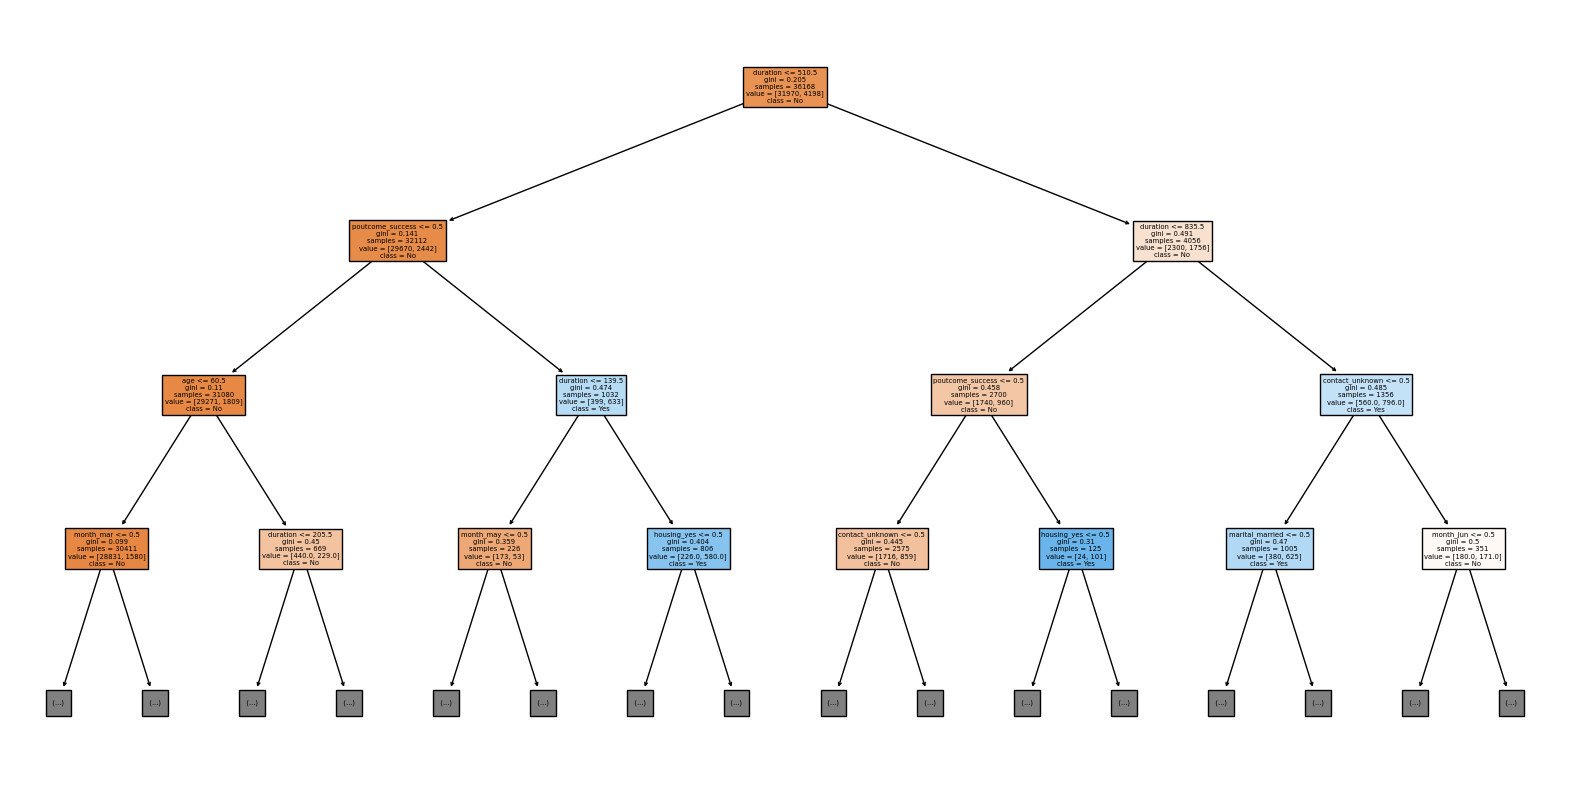

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)  # Limit depth
plt.show()


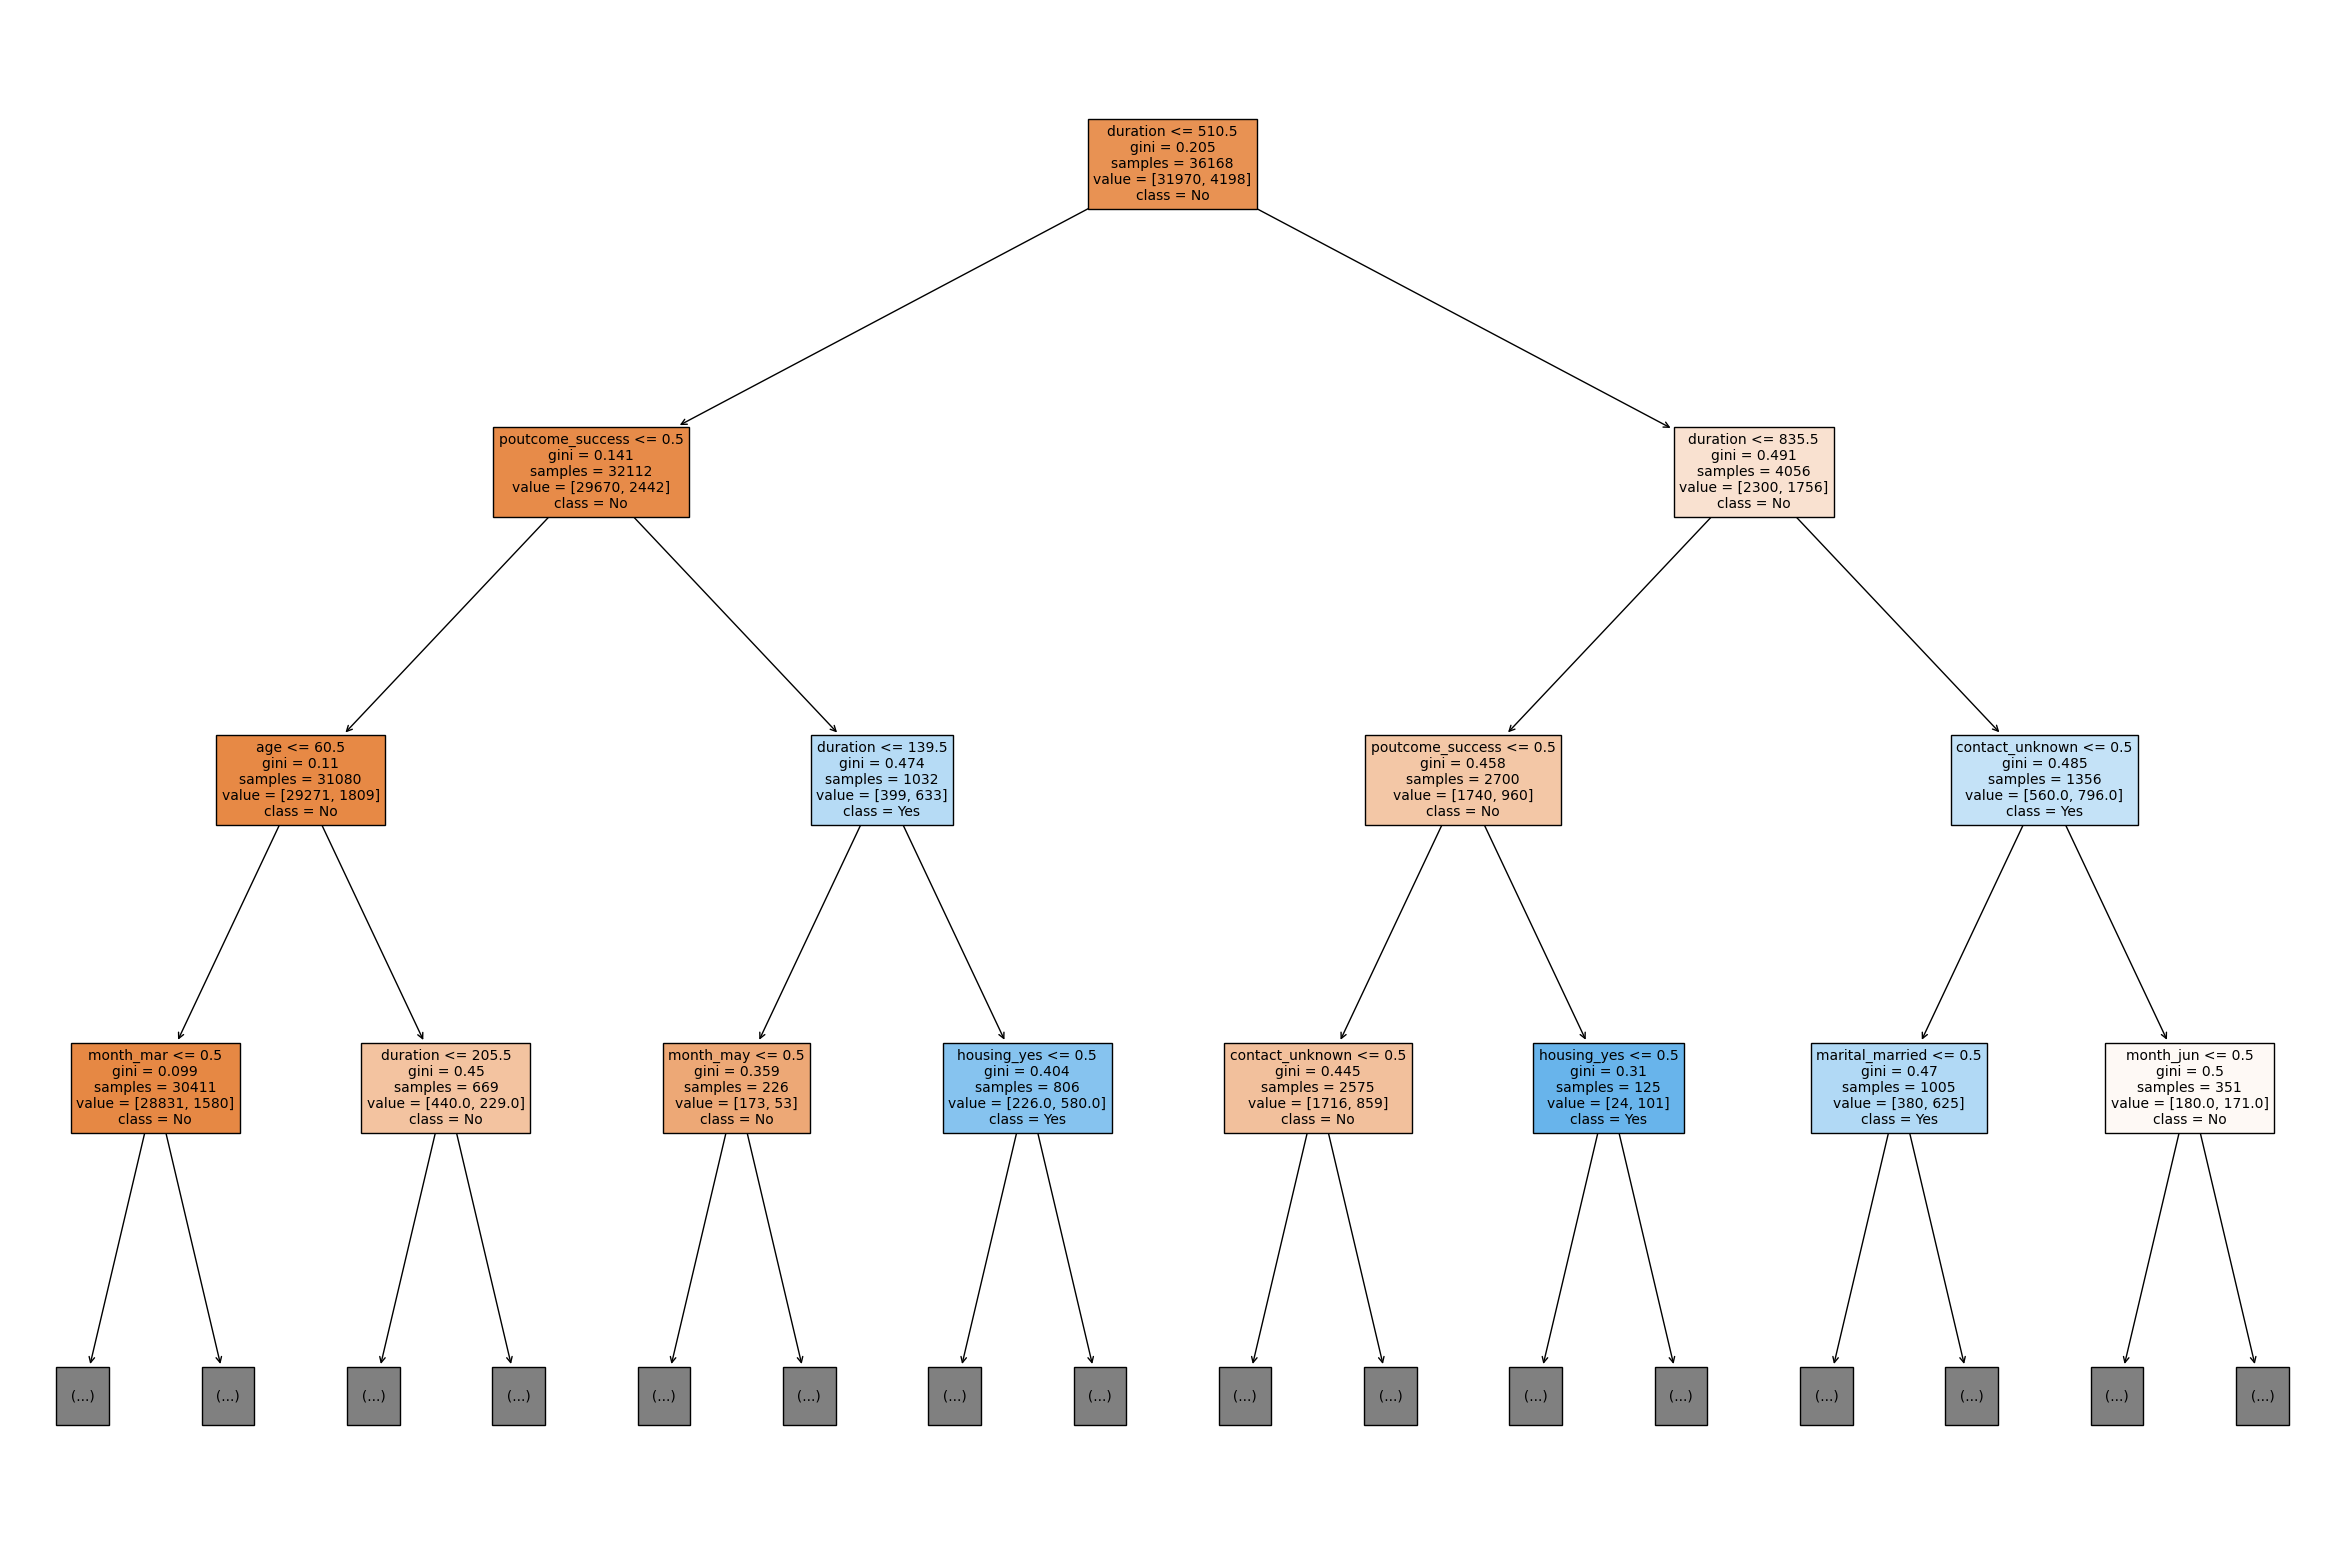

In [17]:
plt.figure(figsize=(30, 20))
plot_tree(
    model, 
    feature_names=X.columns, 
    class_names=['No', 'Yes'], 
    filled=True, 
    max_depth=3,  # Adjust the depth as needed
    fontsize=10
)
plt.show()


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X, y)


DecisionTreeClassifier(max_depth=5, random_state=42)

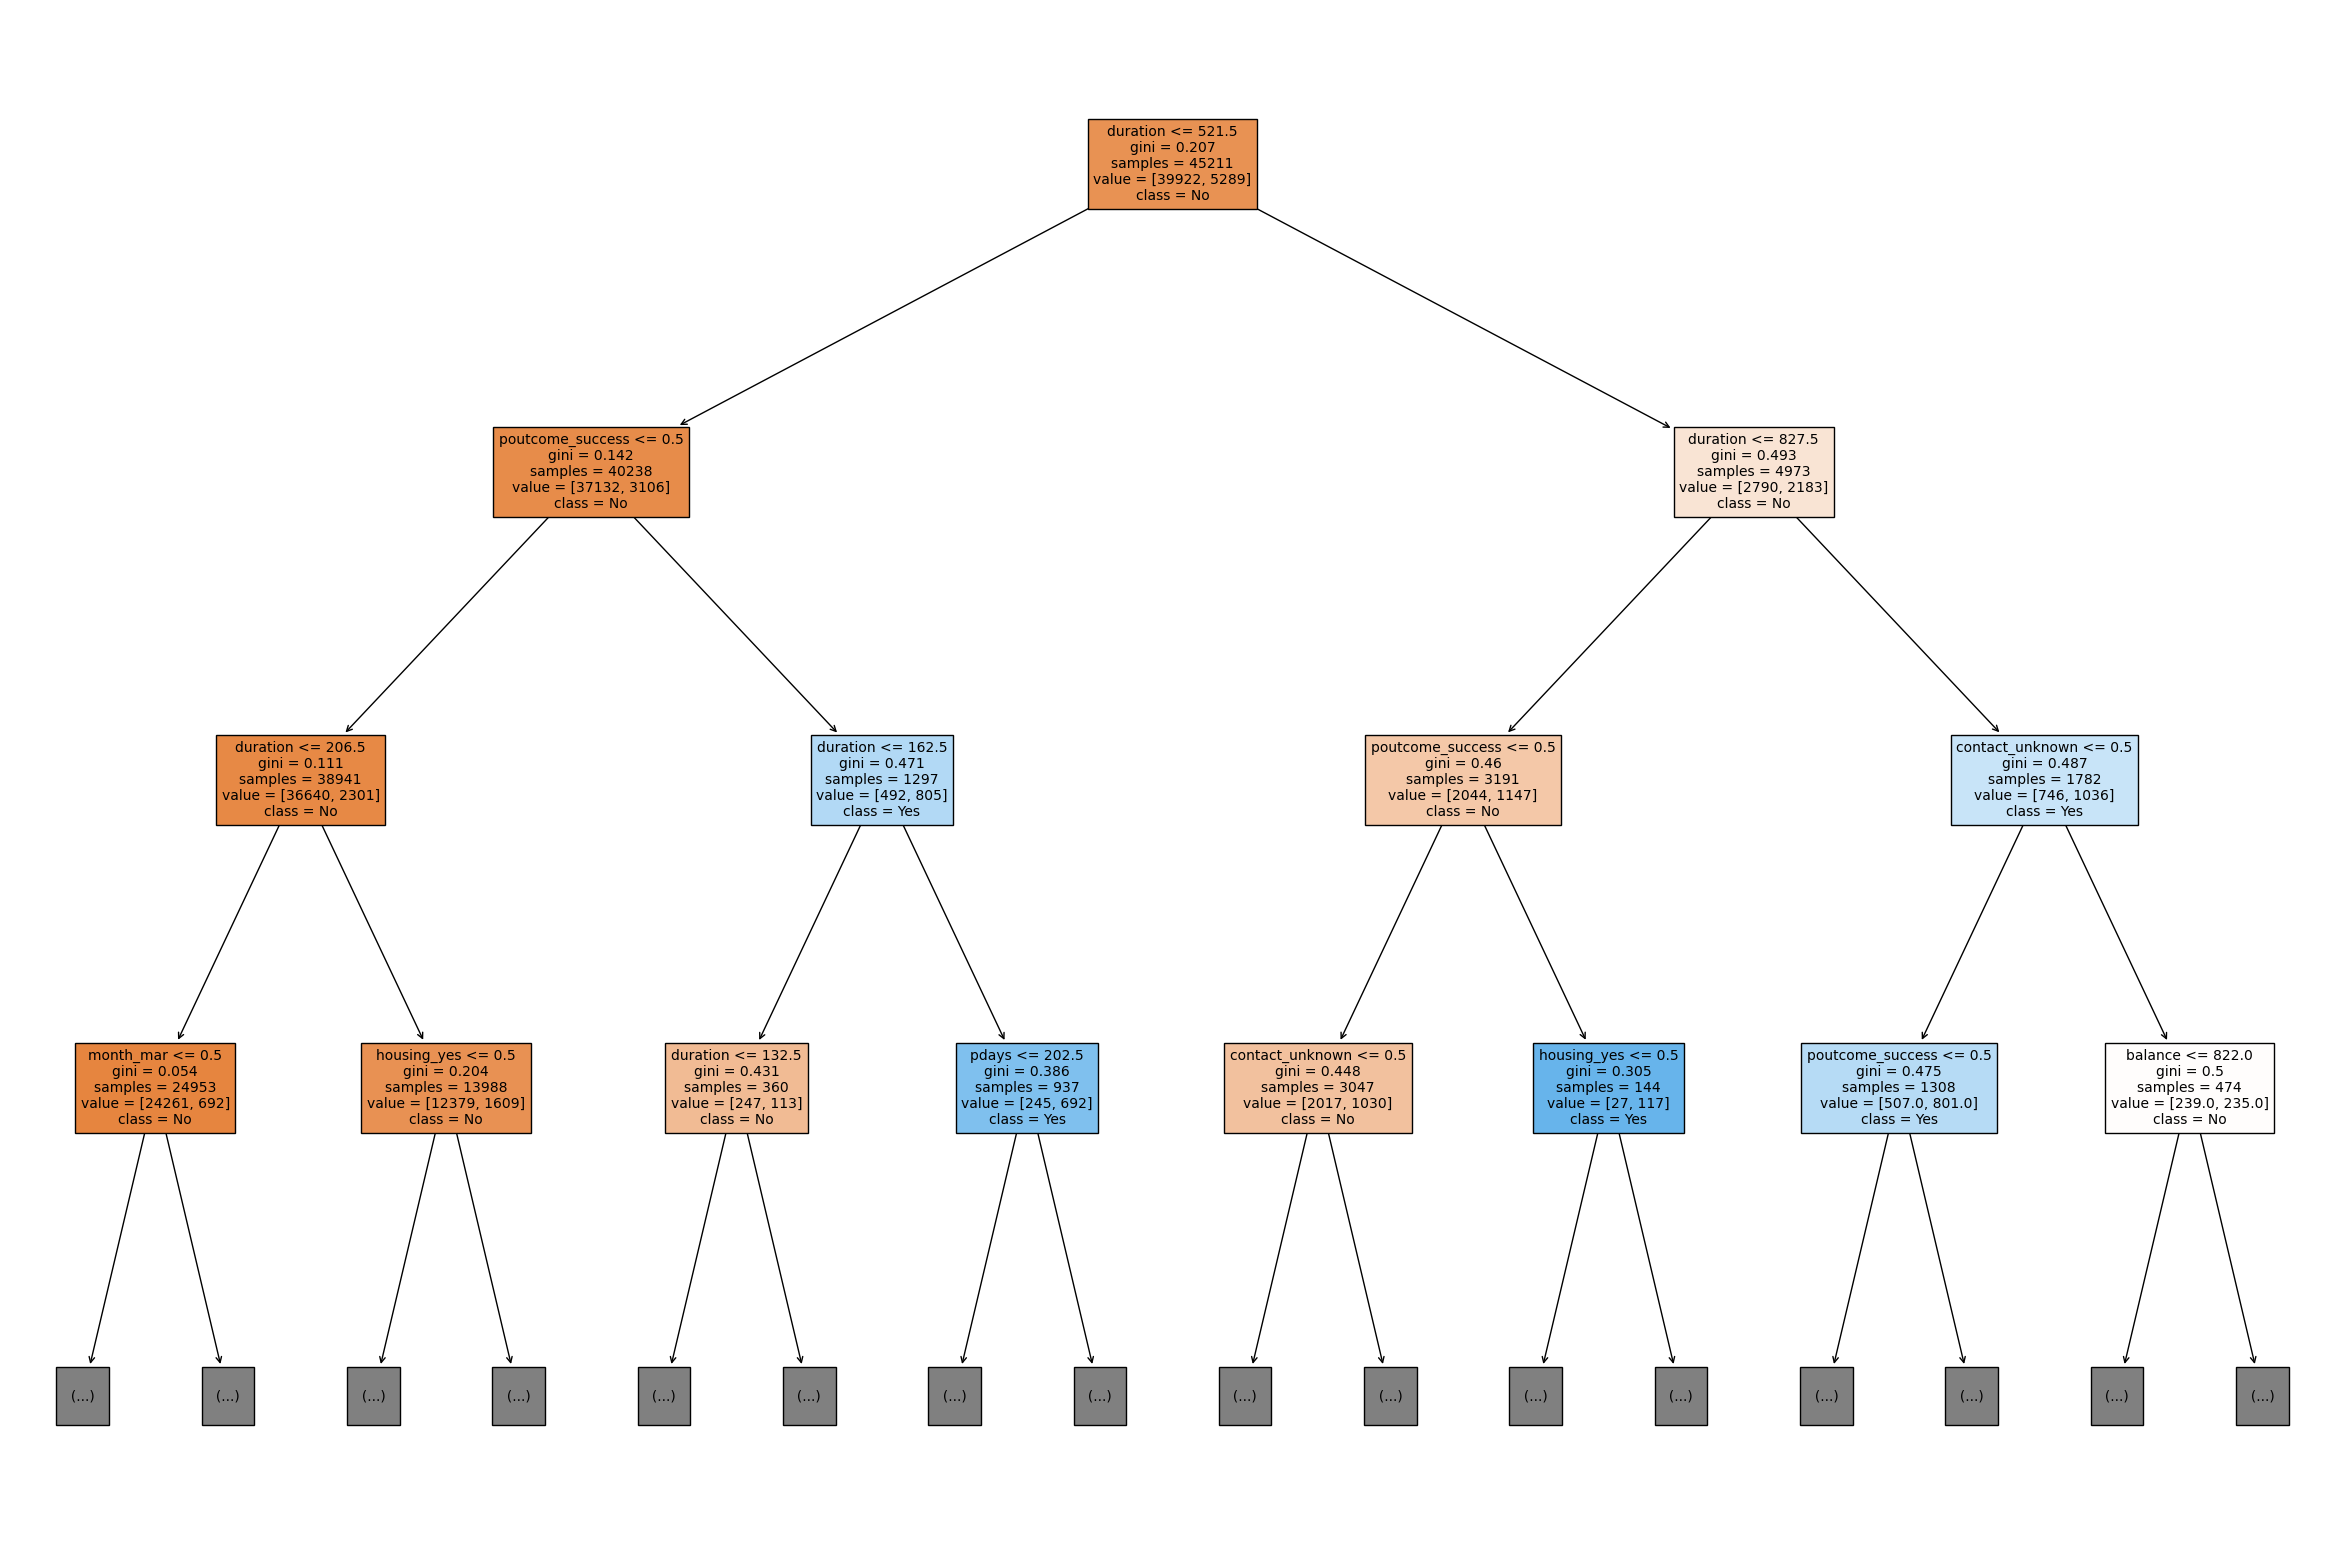

In [19]:
plt.figure(figsize=(30, 20))
plot_tree(
    model,
    feature_names=X.columns,  # Handles DataFrame or NumPy array
    class_names=['No', 'Yes'],  # Update class names based on your target
    filled=True,
    max_depth=3,
    fontsize=10
)
plt.savefig("decision_tree.png", dpi=300)  # Save as an image
plt.show()


### **Step 8:** Document the result

##### 1. Summarize Key Insights from the Classifier's Performance

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.68      0.36      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Confusion Matrix:
 [[7765  187]
 [ 702  389]]


##### 2. Visualizations
-  a. Decision Tree Plot

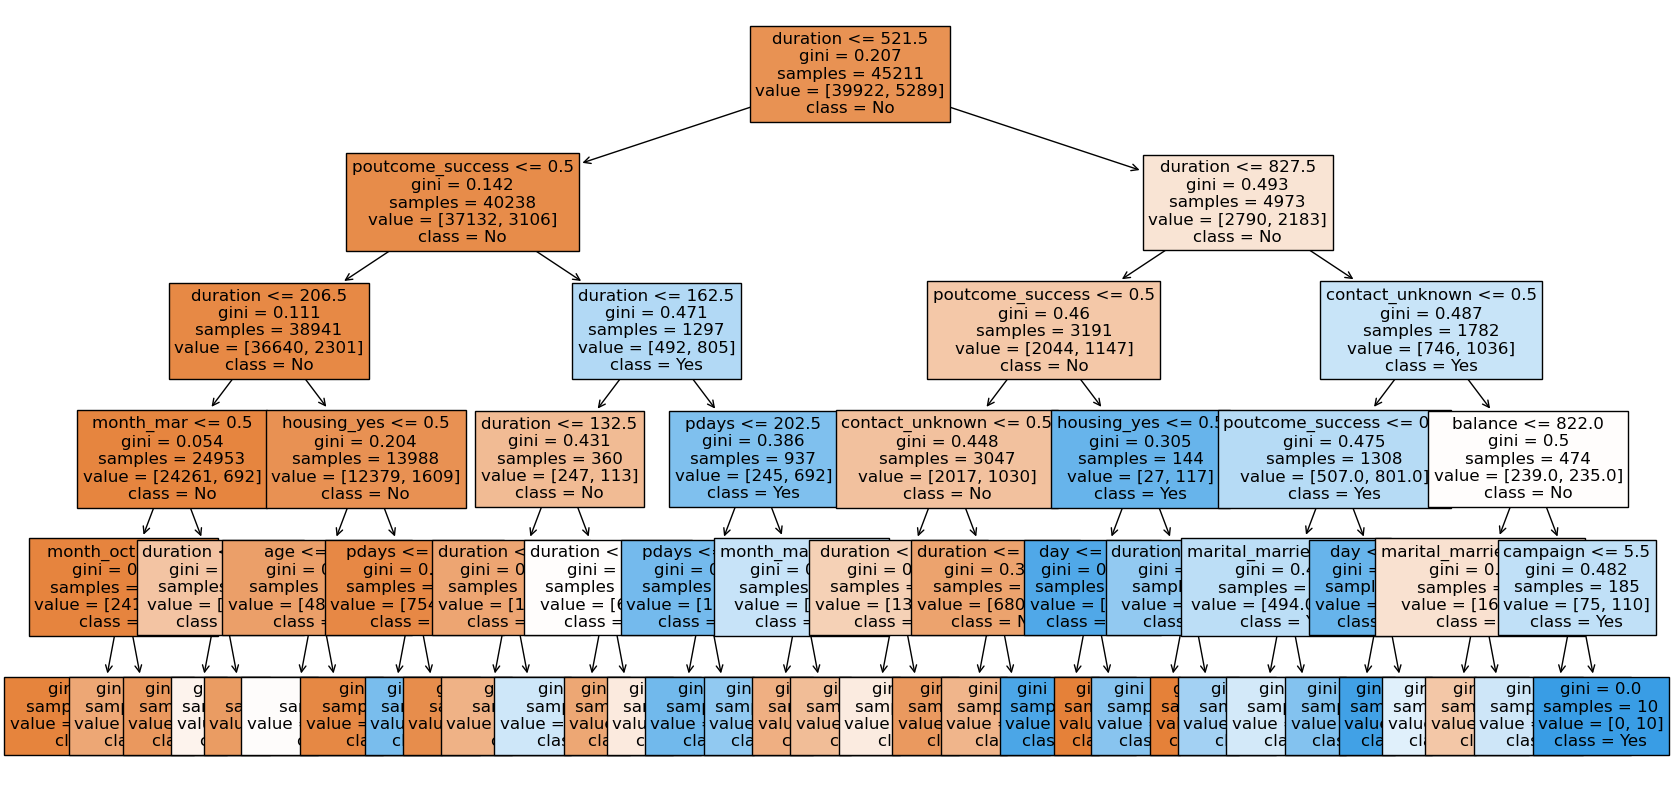

In [21]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Adjust size for clarity
plot_tree(
    model, 
    feature_names=X.columns, 
    class_names=['No', 'Yes'], 
    filled=True, 
    fontsize=12
)
plt.savefig("decision_tree_final.png", dpi=300)
plt.show()


-  b. Feature Importance Visualization

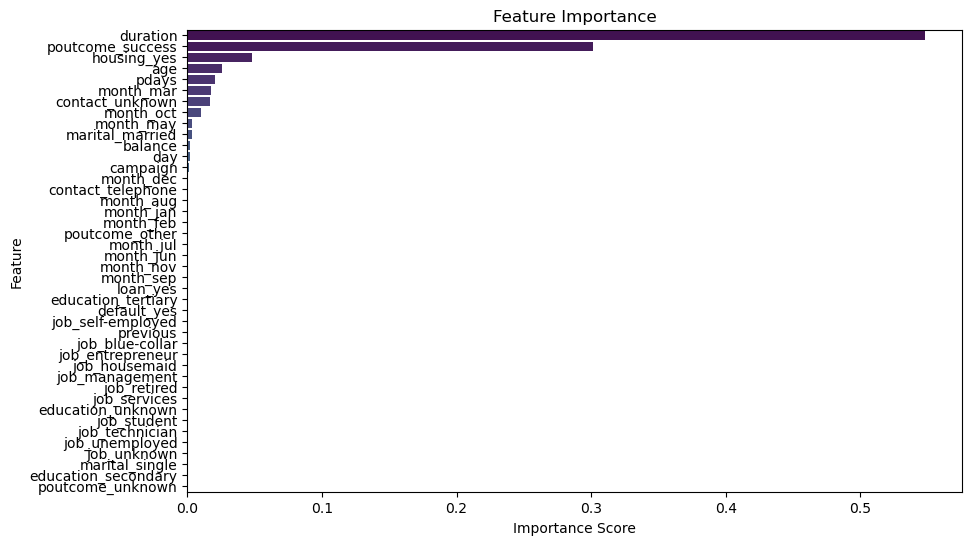

In [22]:
import pandas as pd
import seaborn as sns

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


-  c. Confusion Matrix Heatmap

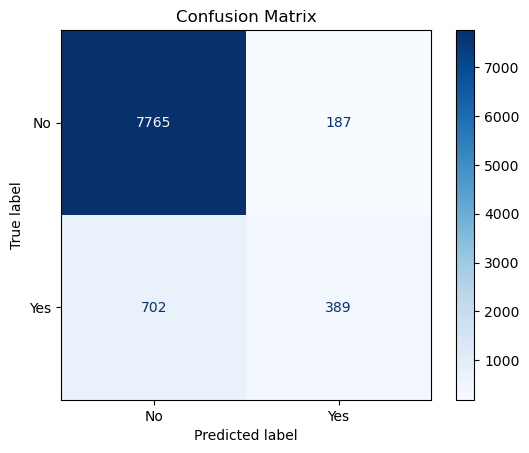

In [23]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', display_labels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.show()


# Conclusion
-  Based on the classification report and confusion matrix, the Decision Tree Classifier has demonstrated strong performance on the majority class (Class 0), but it struggles with identifying positives (Class 1). This is highlighted by the low recall for Class 1, indicating that many positives are being missed.

### Model Evaluation Summary:
-  High accuracy is achieved due to the dominant negative class, but the model's performance on the positive class needs improvement.
-  The imbalance between the classes significantly impacts the model's ability to detect the minority class.
-  The precision-recall trade-off shows that the model is biased toward predicting the majority class, which is common when dealing with imbalanced datasets.